# Pyber Ride Sharing

### Analysis

- We see a clear relationship between City Type and each of the other variables: Total Rides, Total Drivers, and Average Fare. As we move from rural to urban, both the number of drivers and number of rides increase. This makes sense as urban cities are generally larger in population than suburban cities, with rural areas being even smaller.


- While those two variables have a direct relationship with city type (specifically size), our last variable has an inverse relationship with city type. The average fare is lowest in urban cities, which tend to have quicker stops within the city.


- Despite the lower average fares in urban areas, these cities still command a majority share of total fares, due to sheer volume of rides.

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read in CSVs
ride = pd.read_csv("Resources/ride_data.csv", low_memory=False)
city = pd.read_csv("Resources/city_data.csv", low_memory=False)

# Get fare/ride totals for each city
cityfares = ((ride.groupby("city")["fare"].sum()).to_frame()).reset_index()
cityrides = ((ride.groupby("city")["fare"].count()).to_frame()).reset_index()

# Merge fare/ride totals with city info
cities = pd.merge(city, pd.merge(cityfares, cityrides, on="city"), on="city")
cities.columns.values[3] = "fare_total"
cities.columns.values[4] = "ride_total"
cities.head()

,city,driver_count,type,fare_total,ride_total
0,Kelseyland,63,Urban,610.58,28
1,Nguyenbury,8,Urban,673.39,26
2,East Douglas,12,Urban,575.72,22
3,West Dawnfurt,34,Urban,647.58,29
4,Rodriguezburgh,52,Urban,490.65,23


### Bubble Plot of Ride Sharing Data

In [3]:
# Slice city data into city types (Rural, Urban, Suburban)
rural = cities.loc[cities["type"] == "Rural"].reset_index()
rural["average_fare"] = rural["fare_total"] / rural["ride_total"]

urban = cities.loc[cities["type"] == "Urban"].reset_index()
urban["average_fare"] = urban["fare_total"] / urban["ride_total"]

suburban = cities.loc[cities["type"] == "Suburban"].reset_index()
suburban["average_fare"] = suburban["fare_total"] / suburban["ride_total"]
suburban.head()

,index,city,driver_count,type,fare_total,ride_total,average_fare
0,66,Carrollbury,4,Suburban,366.06,10,36.606000
1,67,Williamchester,26,Suburban,377.06,11,34.278182
2,68,New Michelleberg,9,Suburban,274.69,11,24.971818
3,69,West Evan,4,Suburban,324.16,12,27.013333
4,70,South Gracechester,19,Suburban,595.57,19,31.345789


In [4]:
# Slice above DataFrames into Series
rural_cities = rural.iloc[:,1]
rural_rides = rural.iloc[:,5]
rural_drivers = rural.iloc[:,2]
rural_fares = rural.iloc[:,6]

urban_cities = urban.iloc[:,1]
urban_rides = urban.iloc[:,5]
urban_drivers = urban.iloc[:,2]
urban_fares = urban.iloc[:,6]

suburban_cities = suburban.iloc[:,1]
suburban_rides = suburban.iloc[:,5]
suburban_drivers = suburban.iloc[:,2]
suburban_fares = suburban.iloc[:,6]

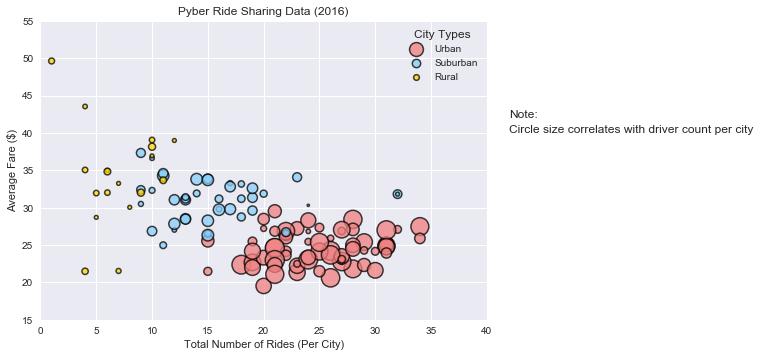

In [7]:
# Initialize plot + format the scatters
fig, ax = plt.subplots()
ax.scatter(urban_rides, urban_fares, urban_drivers*5, alpha=0.75, facecolor="lightcoral", edgecolors="black", linewidths=1.5, label="Urban")
ax.scatter(suburban_rides, suburban_fares, suburban_drivers*5, alpha=0.75, facecolor="lightskyblue", edgecolors="black", linewidths=1.5, label="Suburban")
ax.scatter(rural_rides, rural_fares, rural_drivers*5, alpha=0.75, facecolor="gold", edgecolors="black", linewidths=1.5, label="Rural")

# Format and print the full plot

plt.legend(title="City Types")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.annotate("Note:", xy=(0,20), xytext=(42,42))
plt.annotate("Circle size correlates with driver count per city", xy=(0,20), xytext=(42,40))

plt.xlim(0,40)
plt.ylim(15,55)
plt.show()

# Need to format axes

### Total Fares by City Type

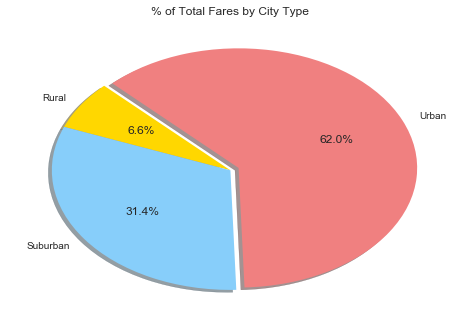

In [8]:
# Sum total fares by city type
cities = cities.reset_index(drop=True)
citytype_fares = cities.groupby("type")["fare_total"].sum()
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.05)

# Format + show plot
plt.title("% of Total Fares by City Type")
plt.pie(citytype_fares, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, colors=["gold", "lightskyblue", "lightcoral"], startangle=135)
plt.show()

### Total Rides by City Type

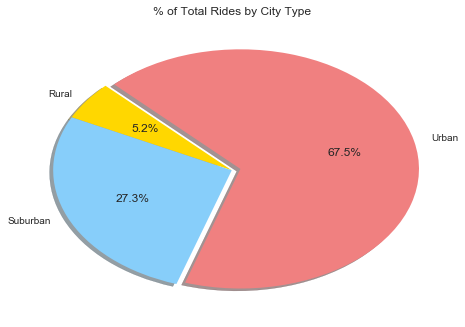

In [9]:
# Sum total rides by city type
citytype_rides = cities.groupby("type")["ride_total"].sum()

# Format + show plot
plt.title("% of Total Rides by City Type")
plt.pie(citytype_rides, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, colors=["gold", "lightskyblue", "lightcoral"], startangle=135)
plt.show()

### Total Drivers by City Type

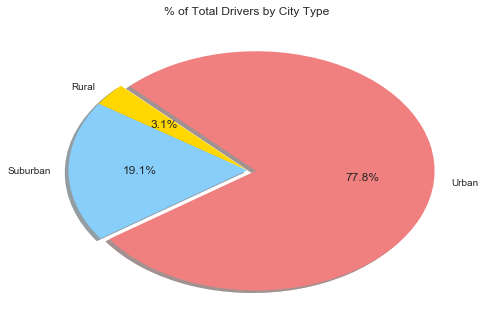

In [10]:
# Sum total drivers by city type
citytype_drivers = cities.groupby("type")["driver_count"].sum()

# Format + show plot
plt.title("% of Total Drivers by City Type")
plt.pie(citytype_drivers, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, colors=["gold", "lightskyblue", "lightcoral"], startangle=135)
plt.show()

In [ ]:
# Fix Port James double